# Assignment 2

Before working on this assignment please read these instructions fully. In the submission area, you will notice that you can click the link to **Preview the Grading** for each step of the assignment. This is the criteria that will be used for peer grading. Please familiarize yourself with the criteria before beginning the assignment.

An NOAA dataset has been stored in the file `data/C2A2_data/BinnedCsvs_d400/ce42cf126a5274f0a3aa1ee140ddcf82d5288d4a3ac707fa49f0eb86.csv`. The data for this assignment comes from a subset of The National Centers for Environmental Information (NCEI) [Daily Global Historical Climatology Network](https://www1.ncdc.noaa.gov/pub/data/ghcn/daily/readme.txt) (GHCN-Daily). The GHCN-Daily is comprised of daily climate records from thousands of land surface stations across the globe.

Each row in the assignment datafile corresponds to a single observation.

The following variables are provided to you:

* **id** : station identification code
* **date** : date in YYYY-MM-DD format (e.g. 2012-01-24 = January 24, 2012)
* **element** : indicator of element type
    * TMAX : Maximum temperature (tenths of degrees C)
    * TMIN : Minimum temperature (tenths of degrees C)
* **value** : data value for element (tenths of degrees C)

For this assignment, you must:

1. Read the documentation and familiarize yourself with the dataset, then write some python code which returns a line graph of the record high and record low temperatures by day of the year over the period 2005-2014. The area between the record high and record low temperatures for each day should be shaded.
2. Overlay a scatter of the 2015 data for any points (highs and lows) for which the ten year record (2005-2014) record high or record low was broken in 2015.
3. Watch out for leap days (i.e. February 29th), it is reasonable to remove these points from the dataset for the purpose of this visualization.
4. Make the visual nice! Leverage principles from the first module in this course when developing your solution. Consider issues such as legends, labels, and chart junk.

The data you have been given is near **Milford, Massachusetts, United States**, and the stations the data comes from are shown on the map below.

In [1]:
import matplotlib.pyplot as plt
#import mplleaflet
import pandas as pd
import numpy as np
import datetime as dt

df = pd.read_csv('data/C2A2_data/BinnedCsvs_d400/ce42cf126a5274f0a3aa1ee140ddcf82d5288d4a3ac707fa49f0eb86.csv')
df.head()

,ID,Date,Element,Data_Value
0,USC00190998,2015-07-18,TMIN,117
1,USW00094746,2009-07-05,TMIN,111
2,USC00192107,2007-07-12,TMAX,328
3,USC00190562,2011-04-21,TMIN,44
4,USC00377581,2015-11-02,TMAX,156


Running some check on the data

In [2]:
# How many observations?
df.shape

(120437, 4)

In [3]:
# What is the data type?
type(df['Date'][1])

str

In [4]:
df['Date'].min()

'2005-01-01'

In [5]:
df['Date'].max()

'2015-12-31'

Convert the tenmp to degree (from tenths of degree)

In [6]:
# Convert the tenmp to degree (from tenths of degree)
df['Data_Value'] = df['Data_Value']/10

Adding a column with Month and Day only

In [7]:
newDate = []
def MonthDay(df):
    for rec in df['Date']:
        seg= rec.split('-')
        newDate.append(seg[1] + '-' + seg[2])
        
        
MonthDay(df)

newDate[0:10]

['07-18',
 '07-05',
 '07-12',
 '04-21',
 '11-02',
 '09-10',
 '10-12',
 '02-21',
 '11-01',
 '01-12']

In [8]:
df['MonthDay'] = newDate
df.head()

,ID,Date,Element,Data_Value,MonthDay
0,USC00190998,2015-07-18,TMIN,11.7,07-18
1,USW00094746,2009-07-05,TMIN,11.1,07-05
2,USC00192107,2007-07-12,TMAX,32.8,07-12
3,USC00190562,2011-04-21,TMIN,4.4,04-21
4,USC00377581,2015-11-02,TMAX,15.6,11-02


Need to separate the dataset into two - 2005 through 2014 and 2015

In [9]:
dfTenYears = df[df['Date'] < '2015-01-01']
dfTenYears.shape

(109527, 5)

In [10]:
df2015 = df[df['Date'] > '2014-12-31']
df2015.shape

(10910, 5)

In [11]:
#dfTenYears['MonthDay'] = newDate
#dfTenYears.head()

In [12]:
# Drop leap days
dfTenYears = dfTenYears[dfTenYears['MonthDay'] != '02-29']
dfTenYears[dfTenYears['MonthDay'] == '02-29']

,ID,Date,Element,Data_Value,MonthDay


In [13]:
dfTenYears.shape
# Dropped

(109467, 5)

Separating dfTenYears into TMAX group and TMIN group

In [14]:
df_tmin = dfTenYears[dfTenYears['Element'] == 'TMIN']
df_tmin.head()

,ID,Date,Element,Data_Value,MonthDay
1,USW00094746,2009-07-05,TMIN,11.1,07-05
3,USC00190562,2011-04-21,TMIN,4.4,04-21
8,USC00063420,2012-11-01,TMIN,3.3,11-01
11,USC00067959,2006-05-26,TMIN,4.4,05-26
12,USC00197627,2007-10-24,TMIN,11.1,10-24


In [15]:
df_tmax = dfTenYears[dfTenYears['Element'] == 'TMAX']
df_tmax.head()

,ID,Date,Element,Data_Value,MonthDay
2,USC00192107,2007-07-12,TMAX,32.8,07-12
5,USC00375270,2012-09-10,TMAX,19.4,09-10
6,USC00190408,2014-10-12,TMAX,11.7,10-12
7,USC00069388,2007-02-21,TMAX,8.9,02-21
10,USC00377581,2008-07-31,TMAX,26.7,07-31


Getting a sorted array for the Date

In [16]:
sortedDate = np.sort(df_tmin['MonthDay'].unique())
sortedDate

array(['01-01', '01-02', '01-03', '01-04', '01-05', '01-06', '01-07',
       '01-08', '01-09', '01-10', '01-11', '01-12', '01-13', '01-14',
       '01-15', '01-16', '01-17', '01-18', '01-19', '01-20', '01-21',
       '01-22', '01-23', '01-24', '01-25', '01-26', '01-27', '01-28',
       '01-29', '01-30', '01-31', '02-01', '02-02', '02-03', '02-04',
       '02-05', '02-06', '02-07', '02-08', '02-09', '02-10', '02-11',
       '02-12', '02-13', '02-14', '02-15', '02-16', '02-17', '02-18',
       '02-19', '02-20', '02-21', '02-22', '02-23', '02-24', '02-25',
       '02-26', '02-27', '02-28', '03-01', '03-02', '03-03', '03-04',
       '03-05', '03-06', '03-07', '03-08', '03-09', '03-10', '03-11',
       '03-12', '03-13', '03-14', '03-15', '03-16', '03-17', '03-18',
       '03-19', '03-20', '03-21', '03-22', '03-23', '03-24', '03-25',
       '03-26', '03-27', '03-28', '03-29', '03-30', '03-31', '04-01',
       '04-02', '04-03', '04-04', '04-05', '04-06', '04-07', '04-08',
       '04-09', '04-

In [17]:
# Convert it to a list
sortedDate = sortedDate.tolist()

In [18]:
# declear lists

def get_min_and_max(sortedList, df, label1, label2):
    # Declear lists to store temp values
    minT = []
    maxT = []
    for day in sortedList:
        minVal = df[df[label1] == day][label2].min()
        minT.append(minVal)
        maxVal = df[df[label1] == day][label2].max()
        maxT.append(maxVal)
  
    return minT, maxT


In [19]:
minTmax, maxTmax = get_min_and_max(sortedDate, df_tmax, 'MonthDay', 'Data_Value')

In [20]:
minTmax[:10]  # Do not need it for this assignment

[-9.4000000000000004,
 -9.4000000000000004,
 -12.699999999999999,
 -12.800000000000001,
 -7.2000000000000002,
 -4.4000000000000004,
 -5.5,
 -12.800000000000001,
 -8.3000000000000007,
 -7.2000000000000002]

In [21]:
maxTmax[:10]

[14.4,
 16.100000000000001,
 12.800000000000001,
 14.4,
 17.199999999999999,
 20.600000000000001,
 21.100000000000001,
 20.600000000000001,
 19.399999999999999,
 16.699999999999999]

In [22]:
minTmin, maxTmin = get_min_and_max(sortedDate, df_tmin, 'MonthDay', 'Data_Value')

In [23]:
minTmin[:10]

[-17.800000000000001,
 -18.800000000000001,
 -24.399999999999999,
 -26.100000000000001,
 -26.100000000000001,
 -17.199999999999999,
 -16.600000000000001,
 -17.800000000000001,
 -18.300000000000001,
 -18.300000000000001]

In [24]:
maxTmin[:10]  # Do not need it for this assignment

[3.2999999999999998,
 3.8999999999999999,
 6.7000000000000002,
 4.4000000000000004,
 7.7999999999999998,
 12.199999999999999,
 5.5999999999999996,
 7.7999999999999998,
 6.7000000000000002,
 3.2999999999999998]

In [25]:
TminByDay = pd.DataFrame(
    {'Date': sortedDate,
     'TMIN_min': minTmin,
     'TMIN_max': maxTmin
    })

TminByDay

,Date,TMIN_max,TMIN_min
0,01-01,3.3,-17.8
1,01-02,3.9,-18.8
2,01-03,6.7,-24.4
3,01-04,4.4,-26.1
4,01-05,7.8,-26.1
5,01-06,12.2,-17.2
6,01-07,5.6,-16.6
7,01-08,7.8,-17.8
8,01-09,6.7,-18.3
9,01-10,3.3,-18.3


In [26]:
TmaxByDay = pd.DataFrame(
    {'Date': sortedDate,
     'TMAX_min': minTmax,
     'TMAX_max': maxTmax
    })

TmaxByDay

,Date,TMAX_max,TMAX_min
0,01-01,14.4,-9.4
1,01-02,16.1,-9.4
2,01-03,12.8,-12.7
3,01-04,14.4,-12.8
4,01-05,17.2,-7.2
5,01-06,20.6,-4.4
6,01-07,21.1,-5.5
7,01-08,20.6,-12.8
8,01-09,19.4,-8.3
9,01-10,16.7,-7.2


Now onto 2015 dataset

In [27]:
# Test a little
df2015[df2015['Date'] == '2015-01-01']['Data_Value'].min()

-13.9

In [28]:
min2015, max2015 = get_min_and_max(sortedDate, df2015, 'MonthDay', 'Data_Value')

In [29]:
len(min2015)

365

In [30]:
len(max2015)

365

In [31]:
data2015min = pd.DataFrame(
    {'Date': sortedDate,
     'minT': min2015,
    })
data2015min

,Date,minT
0,01-01,-13.9
1,01-02,-12.2
2,01-03,-8.9
3,01-04,-8.9
4,01-05,-12.1
5,01-06,-13.9
6,01-07,-16.7
7,01-08,-21.7
8,01-09,-21.7
9,01-10,-21.1


Create a dataframe to show the lowest temp of the day

In [32]:
dayLows = pd.merge(data2015min, TminByDay, on='Date')

In [33]:
dayLows.shape

(365, 4)

In [34]:
dayLows.head()

,Date,minT,TMIN_max,TMIN_min
0,01-01,-13.9,3.3,-17.8
1,01-02,-12.2,3.9,-18.8
2,01-03,-8.9,6.7,-24.4
3,01-04,-8.9,4.4,-26.1
4,01-05,-12.1,7.8,-26.1


In [35]:
data2015max = pd.DataFrame(
    {'Date': sortedDate,
     'maxT': max2015,
    })
data2015max.head()

,Date,maxT
0,01-01,3.9
1,01-02,5.6
2,01-03,5.6
3,01-04,13.3
4,01-05,12.8


In [36]:
dayHighs = pd.merge(data2015max, TmaxByDay, on='Date')
dayHighs.shape

(365, 4)

In [37]:
dayHighs.head()

,Date,maxT,TMAX_max,TMAX_min
0,01-01,3.9,14.4,-9.4
1,01-02,5.6,16.1,-9.4
2,01-03,5.6,12.8,-12.7
3,01-04,13.3,14.4,-12.8
4,01-05,12.8,17.2,-7.2


Loop through dayLows and dayHighs dataframes to find when 2015 had the record low and high

In [38]:
recLowDays = [] # x values
recLowTemp = [] # y values

for index, row in dayLows.iterrows():
    if (row['minT'] < row['TMIN_min']):
        recLowDays.append(row['Date'])
        recLowTemp.append(row['minT'])        

In [39]:
len(recLowDays)

49

In [40]:
recHighDays = [] # x values
recHighTemp = [] # y values

for index, row in dayHighs.iterrows():
    if (row['maxT'] > row['TMAX_max']):
        recHighDays.append(row['Date'])
        recHighTemp.append(row['maxT']) 

In [41]:
len(recHighDays)

33

In [42]:
recHighTemp[:10]

[29.4, 27.8, 28.9, 31.1, 32.2, 31.7, 31.7, 30.6, 33.9, 32.2]

### Graphing Part

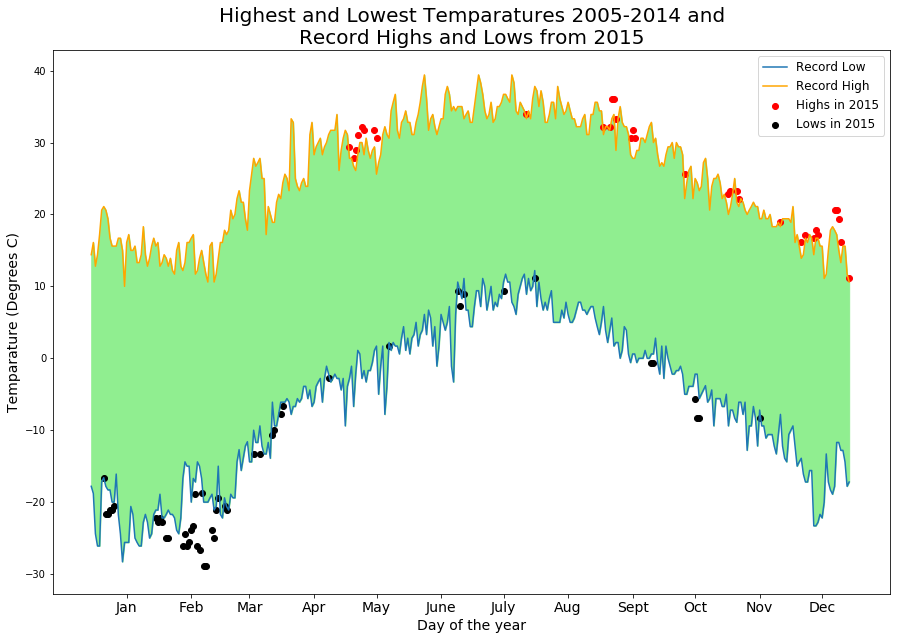

In [79]:
import matplotlib.dates as mdates
import matplotlib as mpl
from datetime import datetime, timedelta
from textwrap import wrap
#%matplotlib notebook
%matplotlib inline

fig, ax = plt.subplots(figsize= (15,10))

title = ax.set_title("\n".join(wrap('Highest and Lowest Temparatures 2005-2014 and Record Highs and Lows from 2015', 50)), fontsize=20)
# Line Plots for TMAX and TMIN
plt.plot(TminByDay['Date'], TminByDay['TMIN_min'], label ='Record Low')
plt.plot(TmaxByDay['Date'], TmaxByDay['TMAX_max'], label='Record High', c='orange')

# Filling the color in between two lines
ax.fill_between(TmaxByDay['Date'], TminByDay['TMIN_min'], TmaxByDay['TMAX_max'], color='lightgreen')

# Scatter plot
plt.scatter(recHighDays, recHighTemp, c='red', alpha=1, label='Highs in 2015')
plt.scatter(recLowDays, recLowTemp, c='black', alpha=1, label='Lows in 2015')
plt.ylabel('Temparature (Degrees C)', fontsize=14)
plt.xlabel('Day of the year', fontsize=14)

# Ticks
m = ['Jan','Feb','Mar','Apr','May','June','July','Aug','Sept','Oct','Nov','Dec']
# Calculating the space between ticks - bringing them at the middle of each month 
ticks = [(datetime(year=2017, month=m, day=1)-datetime(year=2016, month=12, day=15)).days for m in range(1,13)]
# Use a non-leap year

ax.set_xticks(ticks)
ax.set_xticklabels(m)

for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(14) 

# Legend
legend = ax.legend(loc='upper right', fontsize='large')

plt.savefig('tempByDay2005_2015_4.png')

In [ ]:
import matplotlib.pyplot as plt
import mplleaflet
import pandas as pd

def leaflet_plot_stations(binsize, hashid):

    df = pd.read_csv('data/C2A2_data/BinSize_d{}.csv'.format(binsize))

    station_locations_by_hash = df[df['hash'] == hashid]

    lons = station_locations_by_hash['LONGITUDE'].tolist()
    lats = station_locations_by_hash['LATITUDE'].tolist()

    plt.figure(figsize=(8,8))

    plt.scatter(lons, lats, c='r', alpha=0.7, s=200)

    return mplleaflet.display()

leaflet_plot_stations(400,'ce42cf126a5274f0a3aa1ee140ddcf82d5288d4a3ac707fa49f0eb86')